<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [7]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [8]:
boston_df=pd.read_csv(boston_url)

In [26]:
print (boston_df.shape)
boston_df.head()

(506, 14)


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [20]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### Add your code below following the instructions given in the course to complete the peer graded assignment


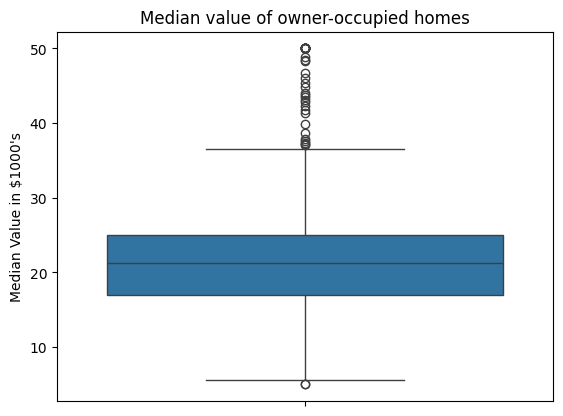

In [44]:
#For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(boston_df["MEDV"])
plt.title('Median value of owner-occupied homes')
plt.ylabel('Median Value in $1000\'s')
plt.show()

Text(0.5, 1.0, 'Bar Plot for Charles River')

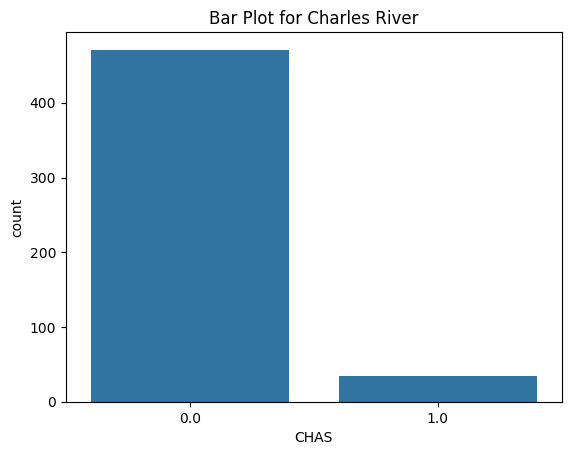

In [36]:
#Provide a  bar plot for the Charles river variable
#sns.barplot(boston_df, x='CHAS')
sns.countplot(boston_df, x="CHAS")
plt.title('Bar Plot for Charles River')

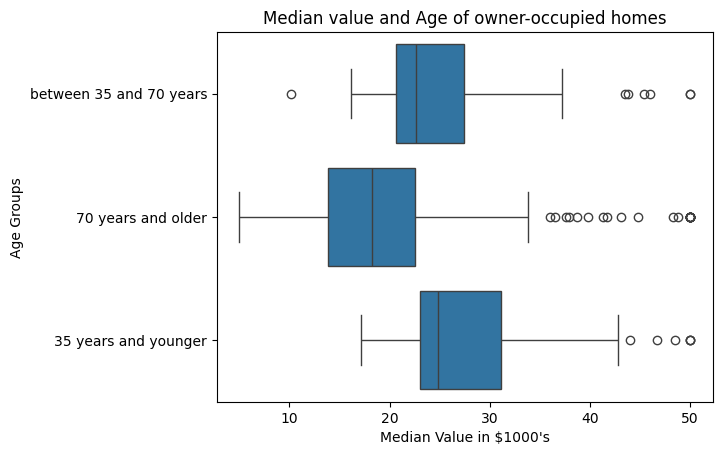

In [46]:
#Provide a boxplot for the MEDV variable vs the AGE variable.
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

#Box plot vs MEDV and AGE
sns.boxplot(data=boston_df, x="MEDV", y='age_group')
plt.title('Median value and Age of owner-occupied homes')
plt.xlabel('Median Value in $1000\'s')
plt.ylabel('Age Groups')
plt.show()

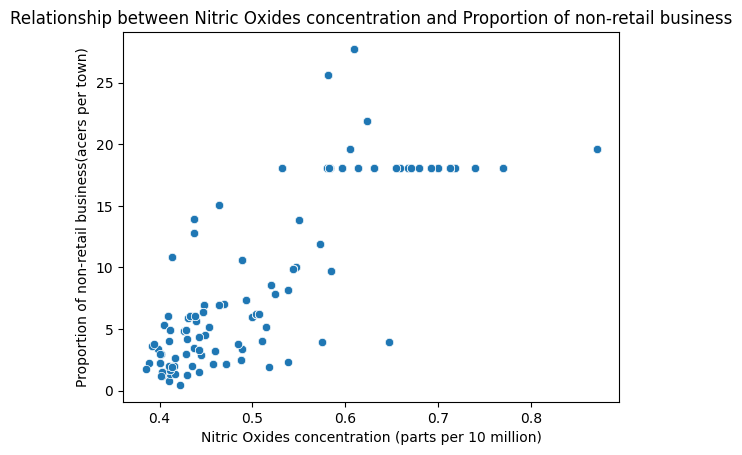

In [50]:
#Provide scatter plot for NOX and INDUS
sns.scatterplot(data=boston_df, x="NOX", y="INDUS")
plt.title('Relationship between Nitric Oxides concentration and Proportion of non-retail business')
plt.xlabel('Nitric Oxides concentration (parts per 10 million)')
plt.ylabel('Proportion of non-retail business(acers per town)')
plt.show()
#

###### The proportion of non-retail businesses are more concentrated where thereis less concentration of Nitric Oxides.


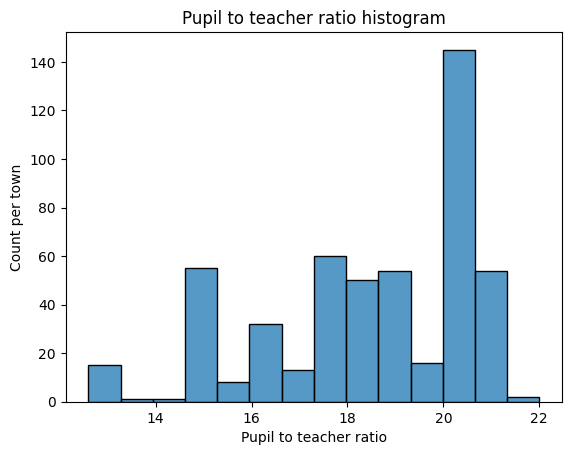

In [52]:
#Pupil to teacher ration
sns.histplot(data=boston_df, x="PTRATIO")
plt.title('Pupil to teacher ratio histogram')
plt.xlabel('Pupil to teacher ratio')
plt.ylabel('Count per town')
plt.show()

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)


In [71]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
"""
    $H0: µ1 = µ2 ("there is no difference in median values of houses bounded by Charles river")
    $H1: µ1 ≠ µ2 ("there is a significant difference in median values of houses bounded by Charles river")
    aplha: 0.05
"""
levene = scipy.stats.levene(boston_df[boston_df['CHAS'] == 0 ]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='median')

print(levene)

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)


In [81]:
#as we can see the p-value is less than 0.05 the variance is not equal.
ttest = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)
print (ttest)
print ("Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough evidence that there is a statistical difference median values of the houses bounded by Charles River")

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)
Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough evidence that there is a statistical difference median values of the houses bounded by Charles River


#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA).


In [ ]:
"""
    Hypothesis.
    H0: µ1 = µ2 = µ3 (the three owner occupied units built prior to 1940, medians are equal)
    H1: At least one of the medians differ
    aplha: 0.05
"""

In [75]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='median')
# since the p-value is less than 0.05, the variance are not equal, for the purposes of this exercise, we will move along

LeveneResult(statistic=3.471820890881101, pvalue=0.031806778061338456)

In [77]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [79]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
print ("Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the median differ.")

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15
Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the median differ.


#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


In [ ]:
"""
    Hypothesis:
    H0: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
    H1: Nitric oxide concentrations and proportion of non-retail business acres per town ARE CORRELATED
    aplha: 0.05
"""

In [84]:
pearson_result = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(pearson_result)
print("Conclusion: Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)
Conclusion: Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


In [ ]:
"""
    Hypothesis:
    H0: additional weighted distance to the five Boston employment centres has NO impact on the median value of owner occupied homes
    H1: additional weighted distance to the five Boston employment centres IMPACTS on the median value of owner occupied homes
    aplha: 0.05
"""

In [87]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        01:30:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1]:
print("Conclusion: p < 0.05, we REJECT the H0 and state that, there is enough evidence that, additional weighted distance to the five Boston employment centres IMPACTS on the median value of owner occupied homes.")

Conclusion: p < 0.05, we REJECT the H0 and state that, there is enough evidence that, additional weighted distance to the five Boston employment centres IMPACTS on the median value of owner occupied homes.
